# Analyse exploratoire des données de Stack Overflow

Ce notebook regroupe les travaux d'analyse exploratoire de données issue de données importées via l'outil [stackexchange explorer](https://data.stackexchange.com/stackoverflow/query/new).

## Contexte

Afin de permettre de faciliter le parcours des utilisateurs de l'outil communautaire Stack Overflow nous avons travaillé sur la mise à disposition d'une API de suggestion de tags.

## Importation des données

Nous avons récupéré l'ensemble des posts sur la période janvier 2018 à juillet 2021. Nous avons utilisé l'outil  [stackexchange explorer](https://data.stackexchange.com/stackoverflow/query/new) afin de récupére l'ensemble des posts publiés entre janvier 2018 et juillet 2021. Il ne permet de récupérer que 50 000 entrée par requête SQL. Nous avons donc réalisé une requête par mois sur l'ensembe de la période. aCes dernières avaient les critères suivants:

- Ayant un Score non nul
- Ayant un nombre de vues non nul
- Ayant un nombre de réponses non nul
- Ayant un nombre de commentaires non nul
- Ayant un nombre de mise en favoris non nul

Ci-dessous un exemple de requête :

SELECT TOP(50000) Id, CreationDate, Score, ViewCount, AnswerCount, CommentCount, FavoriteCount, Title, Body, Tags

FROM Posts

WHERE CreationDate BETWEEN CONVERT(datetime, '2020-01-01') AND CONVERT(datetime, '2020-02-01')

AND Score IS NOT NULL

AND ViewCount IS NOT NULL

AND AnswerCount IS NOT NULL

AND CommentCount IS NOT NULL

AND FavoriteCount IS NOT NULL

ORDER BY CreationDate 

Après la collecte de l'ensemble des fichiers CSV nous récupérons toutes les observations dans un dataframe.

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import IPython.display
import numpy as np
import pandas as pd 


print('### Data files ###')
for idx, file in enumerate(os.listdir('./data')):
    print(idx, '-', file)
print('\n' + '-' *50 +'\n')

data = pd.DataFrame()

for idx, file in enumerate(os.listdir('./data')):
    path = './data/' + file
    df = pd.read_csv(path,
                     index_col = 0,
                     parse_dates=['CreationDate'],
                     na_values = 'NaN'
                    )
        
    data = pd.concat([data, df],
                      axis=0)
    
na_body_idx = data[data['Body'].isna()==True].index
data.drop(index = na_body_idx, inplace=True)
data.sort_values('CreationDate', inplace=True)
print("Dix premières valeurs du dataset")
display(data.head(10))
print('\n' + '-' *50 +'\n')
print(f"Nombre d'observations: {data.shape[0]}, nombre de variables: {data.shape[1]}")

### Data files ###
0 - QueryResults-2018-12.csv
1 - QueryResults-2021-03.csv
2 - QueryResults-2019-03.csv
3 - QueryResults-2018-09.csv
4 - QueryResults-2018-04.csv
5 - QueryResults-2018-02.csv
6 - QueryResults-2020-01.csv
7 - QueryResults-2020-11.csv
8 - QueryResults-2018-03.csv
9 - QueryResults-2020-10.csv
10 - QueryResults-2020-09.csv
11 - QueryResults-2020-12.csv
12 - QueryResults-2018-10.csv
13 - QueryResults-2021-07.csv
14 - QueryResults-2020-03.csv
15 - QueryResults-2018-11.csv
16 - QueryResults-2018-07.csv
17 - QueryResults-2019-11.csv
18 - QueryResults-2018-05.csv
19 - QueryResults-2020-05.csv
20 - QueryResults-2021-02.csv
21 - QueryResults-2018-01.csv
22 - QueryResults-2019-12.csv
23 - QueryResults-2019-09.csv
24 - QueryResults-2019-08.csv
25 - QueryResults-2021-05.csv
26 - QueryResults-2019-04.csv
27 - QueryResults-2019-10.csv
28 - QueryResults-2020-07.csv
29 - QueryResults-2018-08.csv
30 - QueryResults-2020-06.csv
31 - QueryResults-2021-06.csv
32 - QueryResults-2019-06.csv
3

,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags
Id,,,,,,,,,
48046379,2018-01-01 00:00:32,2,4929,1,0,1,nginx gunicorn 502 bad gateway: upstream prema...,<p>I have a Django app with which users can cr...,<python><django><nginx>
48046399,2018-01-01 00:05:47,0,175,0,3,1,Observablecollection from Query,<p>I am working to implement a local SQLite DB...,<c#><sqlite><xamarin>
48046411,2018-01-01 00:10:20,12,7833,2,0,3,How to increment the counter inside a Liquid f...,<p>I am struggling to figure out how to increm...,<jekyll><liquid>
48046415,2018-01-01 00:11:07,0,736,1,0,1,"Facebook crawlers over angularjs app, javascri...",<p>My site is built with AngularJS and Worpres...,<javascript><angularjs><facebook><facebook-gra...
48046437,2018-01-01 00:15:41,15,9426,3,12,6,How to use dependency injection with inheritan...,"<h1>Introduction</h1>\n<p>Hi everyone, I'm cur...",<c#><inheritance><dependency-injection><solid-...
48046449,2018-01-01 00:19:11,5,1276,1,5,1,Apple Watch console / device logs is empty,"<p>In XCode > Window > Devices and Simulators,...",<ios><xcode><apple-watch>
48046455,2018-01-01 00:21:12,3,17183,1,1,1,Multiple Group by in SQL,<p>I have a table like this.</p>\n\n<pre><code...,<sql><group-by>
48046462,2018-01-01 00:23:19,2,2420,1,0,1,pyqt5 i save the image but it is always empty,<p>I am using PyQt5 to build a GUI and inside ...,<python><pyqt><pyqt4><pyqt5>
48046494,2018-01-01 00:33:32,1,91,1,1,0,Pydoc Uncaught Exception,<p>I looked up sys in pydoc because a book I a...,<python><exception><exception-handling><pydoc>



--------------------------------------------------

Nombre d'observations: 902285, nombre de variables: 9


## Test des valeurs manaquantes

Avant tout traitement nous souhaitons savoir si certaines observations variables sont manquantes.

In [2]:
def test_completion(data):
    """
    Compute sorted completion rate and number of missing values for each variable of the argument in a descending order
    
    Args:
        data(dataset) : A dataset with variables
        
    Returns:
        A specific dataframe with completion rate for each variable. 
        Schema :
            Index(string): Variable names
            Taux de completion(float): completion rate
            Nombre de valeurs manquantes(int): Number of missing values
    """
    var_dict = {}
    
    for col in data.columns:
        var_dict[col] = []
        var_dict[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        var_dict[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=var_dict, orient="index", columns = ["Taux de complétion", "Nombre de valeurs manquantes"]).sort_values(by="Taux de complétion", ascending=False)

test_completion(data)

,Taux de complétion,Nombre de valeurs manquantes
CreationDate,100.0,0
Score,100.0,0
ViewCount,100.0,0
AnswerCount,100.0,0
CommentCount,100.0,0
FavoriteCount,100.0,0
Title,100.0,0
Body,100.0,0
Tags,100.0,0


Nous ne constatons aucune valeur manquante

## Analyse statistique des variables numériques

### CreationDate

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


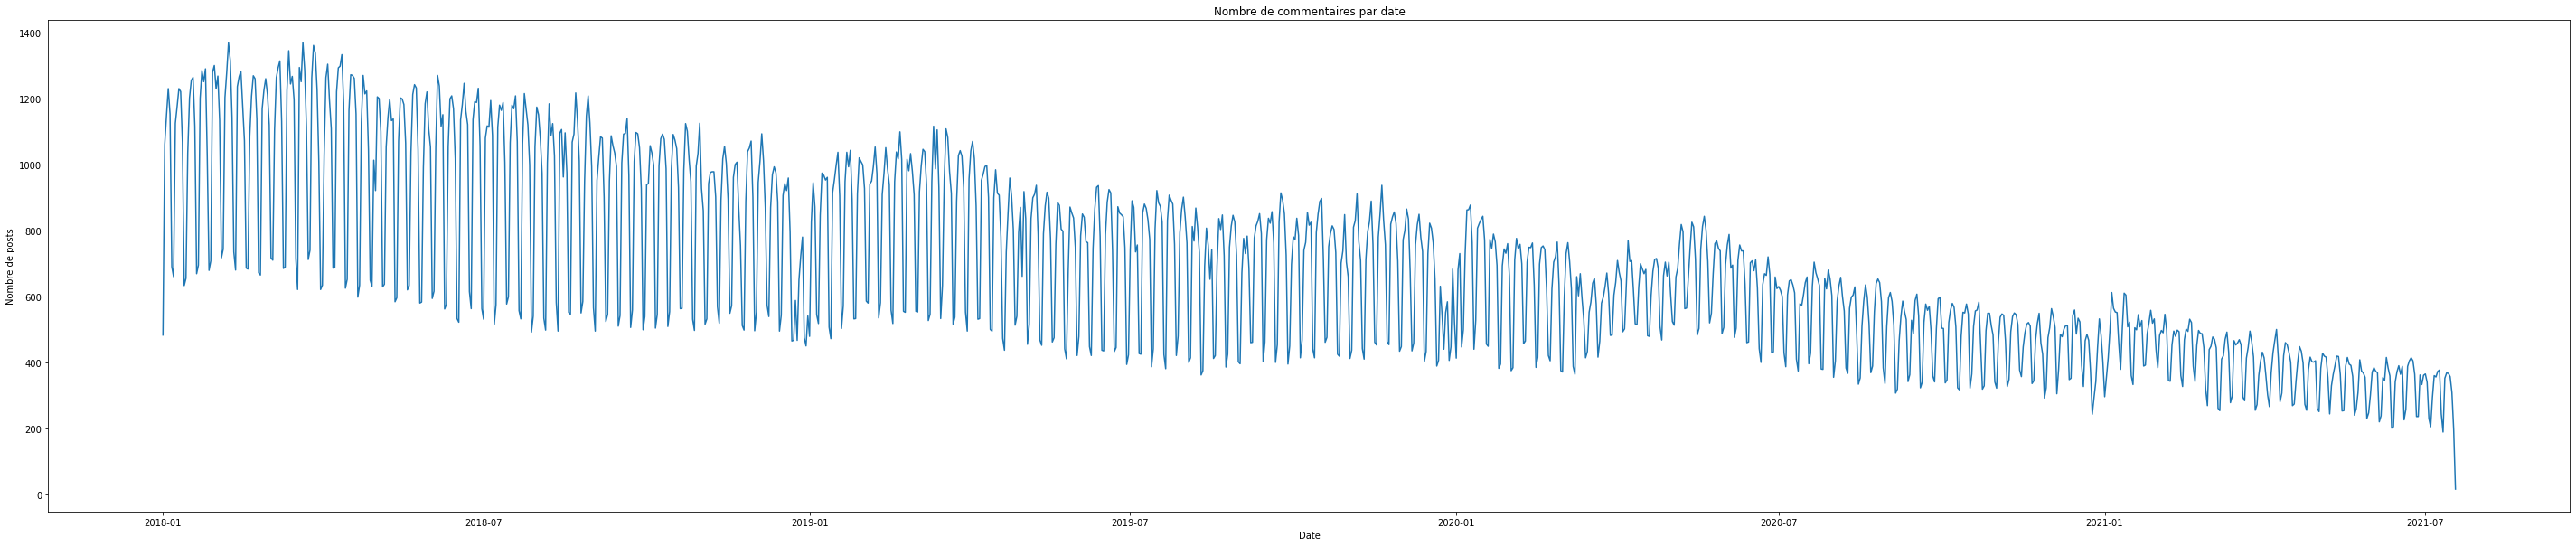

In [3]:
%pylab 
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50,10))
CreationDateByDay = data['CreationDate'].dt.date.value_counts()

sns.lineplot(data=CreationDateByDay, x=CreationDateByDay.index, y=CreationDateByDay.values, ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Nombre de posts")
ax.set_title("Nombre de commentaires par date")

plt.show()

Nous constatons une baisse d’activité sur la période. 

Nous pouvons en déduire une proportion de posts décroissante dans le temps. Donc, filtrer les posts par date de création pénaliserait les publications les plus récentes et les thématiques qui y sont associées.

### Score

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


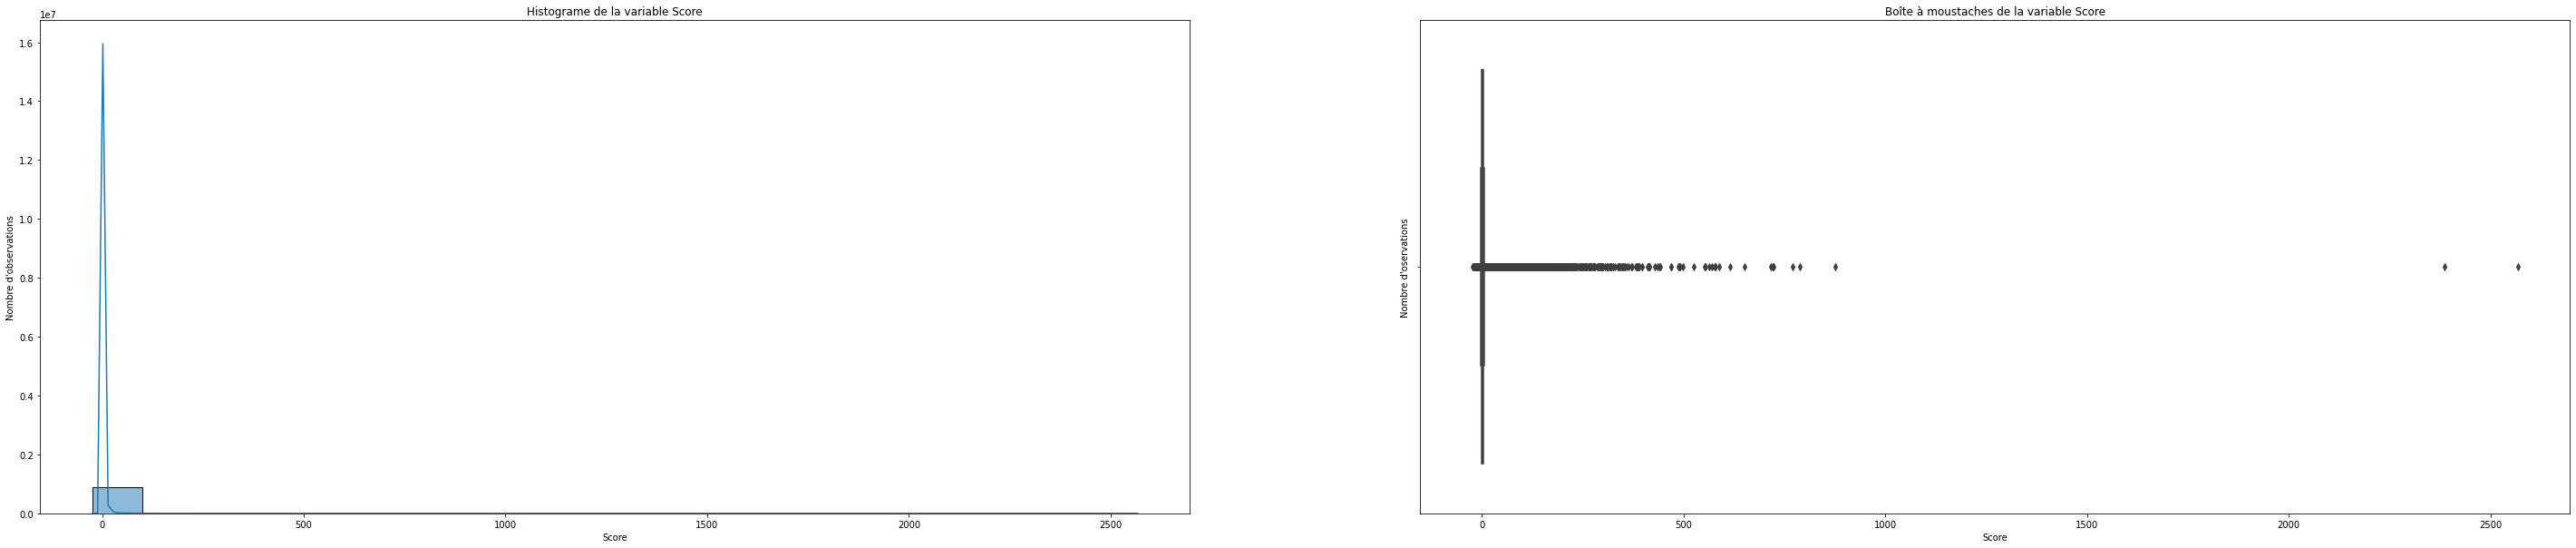


--------------------------------------------------

Indicateurs statistiques de distribution de la variable Score:


count    902285.000000
mean          2.471324
std           8.916901
min         -24.000000
25%           0.000000
50%           1.000000
75%           3.000000
max        2567.000000
Name: Score, dtype: float64

In [4]:
%pylab 
%matplotlib inline
import seaborn as sns


def plot_continuous_distribution(data, col, bins='sturges'):
    """
    Plot distribution plot, box plot and statistical distribution figures
    
    Args: 
        data(DataFrame): Name of the dataframe 
        
        col(String): Name of the column to plot
        
    Returns:
        Variable distribution plots and figures
    """
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(50,10))
    
    sns.histplot(data=data, x=col, bins='sturges', kde=True, ax=ax[0])
    ax[0].set_xlabel(f"{col}")
    ax[0].set_ylabel("Nombre d'observations")
    ax[0].set_title(f"Histograme de la variable {col}")
    
    sns.boxplot(data=data, x=col)
    ax[1].set_xlabel(f"{col}")
    ax[1].set_ylabel("Nombre d'oservations")
    ax[1].set_title(f"Boîte à moustaches de la variable {col}")
    plt.show()
    
    print("\n" + "-" * 50 + "\n")
    print(f"Indicateurs statistiques de distribution de la variable {col}:")
    display(data[col].describe())
    
    
plot_continuous_distribution(data=data, col='Score')

Nous constatons une distribution centrée autour de la valeur 1 avec une majrité d'observation situées dans l'interquartile entre 0 et 3. 

### ViewCount

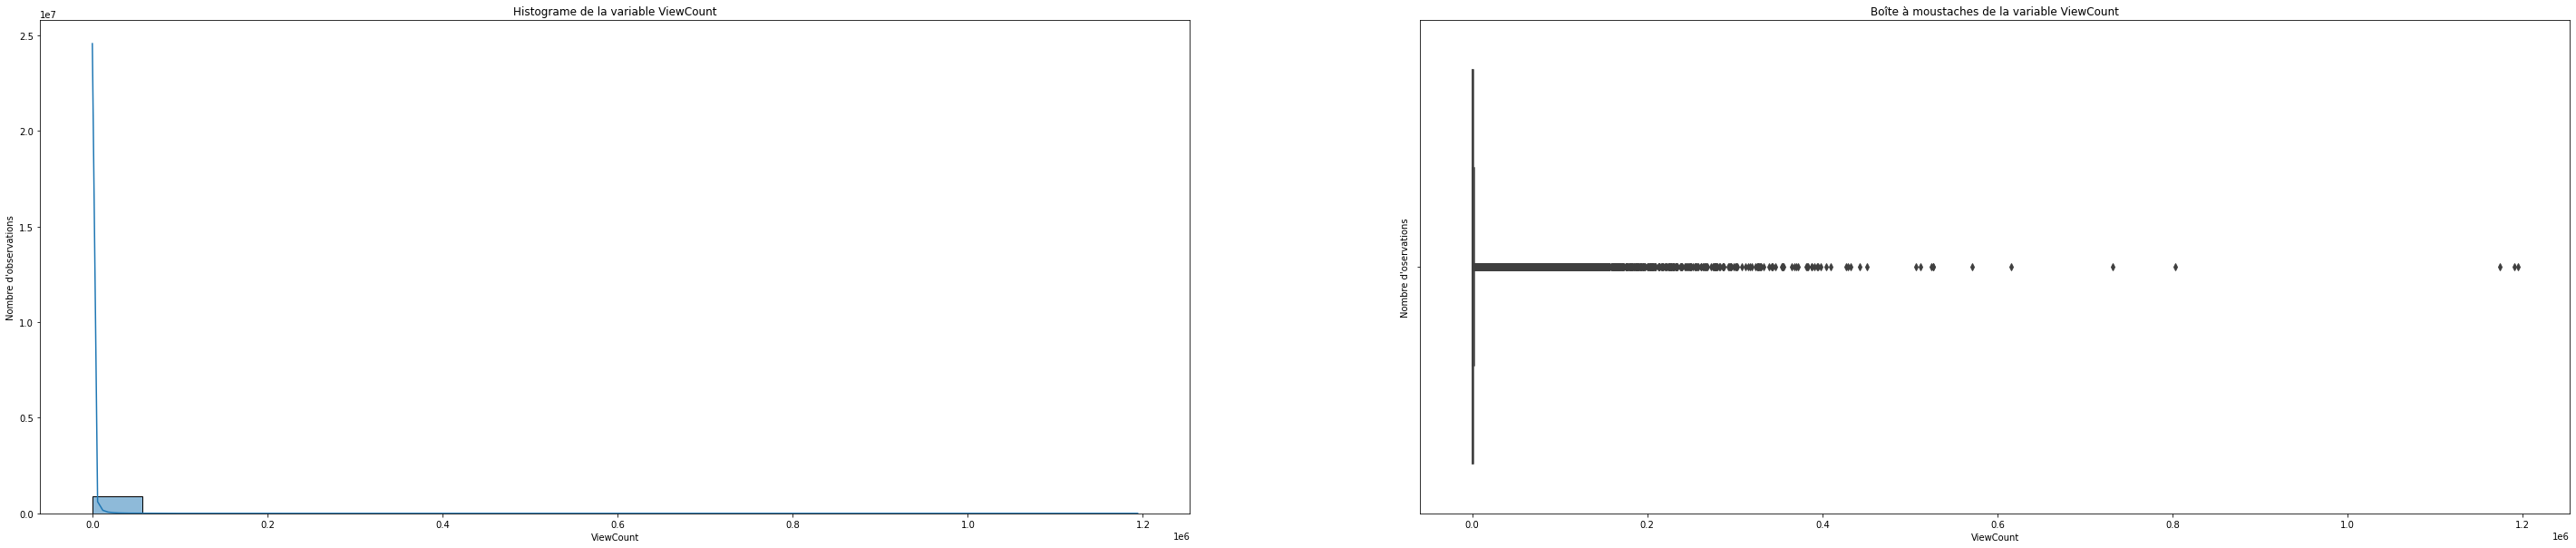


--------------------------------------------------

Indicateurs statistiques de distribution de la variable ViewCount:


count    9.022850e+05
mean     1.867687e+03
std      7.830824e+03
min      3.000000e+00
25%      7.900000e+01
50%      3.000000e+02
75%      1.211000e+03
max      1.194064e+06
Name: ViewCount, dtype: float64

In [5]:
plot_continuous_distribution(data=data, col='ViewCount')

Nous constatons une distribution centrée autour de 98 avec un équart interquartile entre 79 et 1211.

### AnswerCount

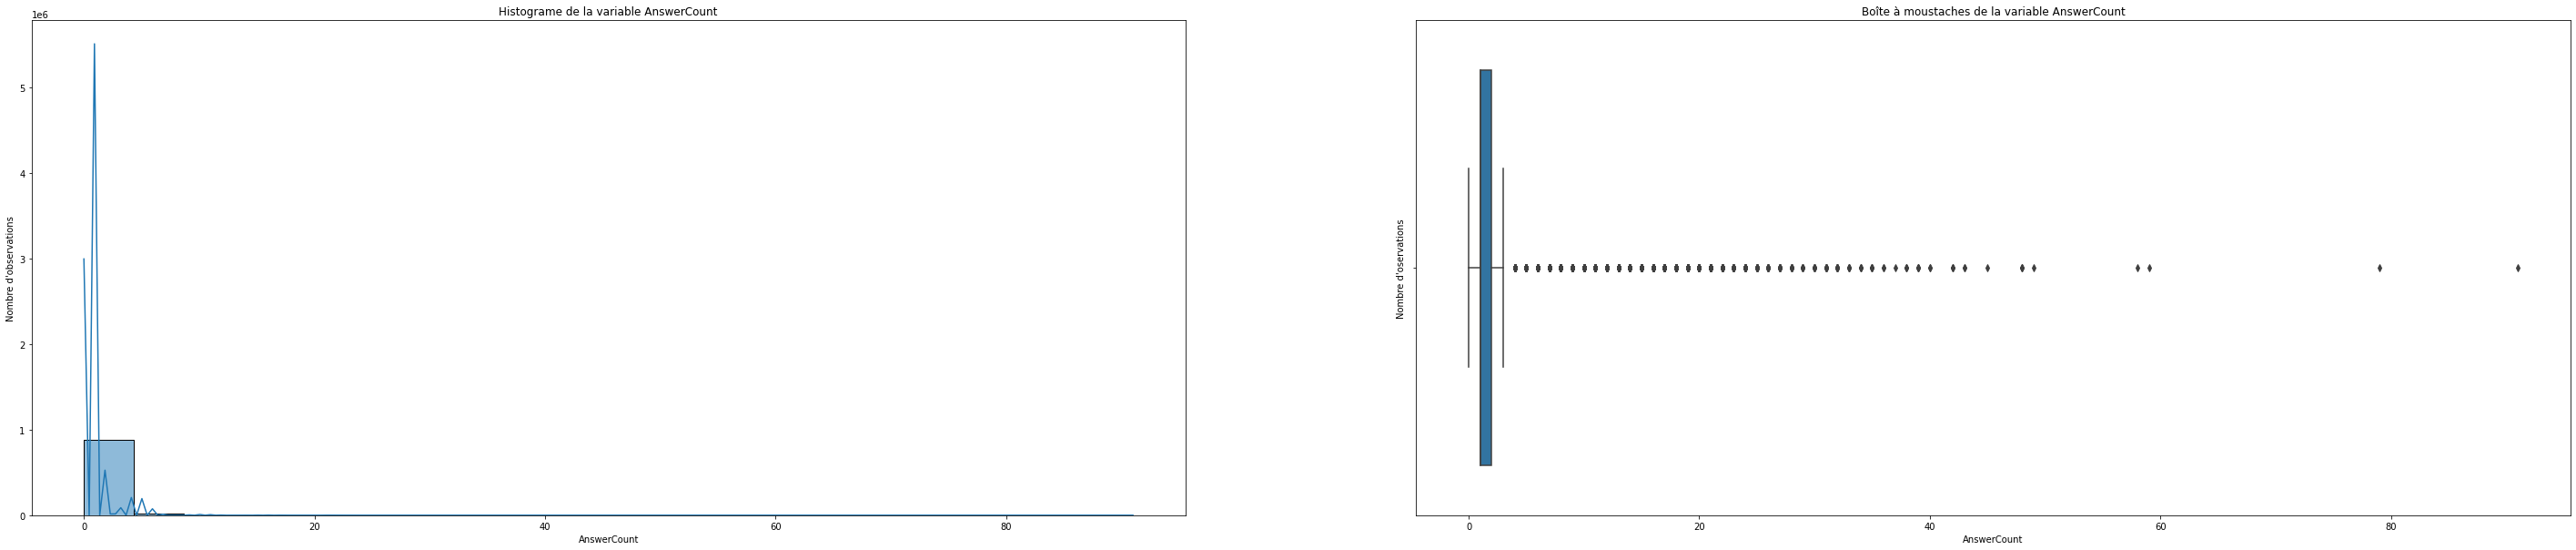


--------------------------------------------------

Indicateurs statistiques de distribution de la variable AnswerCount:


count    902285.000000
mean          1.414561
std           1.330395
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          91.000000
Name: AnswerCount, dtype: float64

In [6]:
plot_continuous_distribution(data=data, col='AnswerCount')

La distribution de la variable est centrée autour de 1 avec un équart interquartile entre 1 et 2

### CommentCount

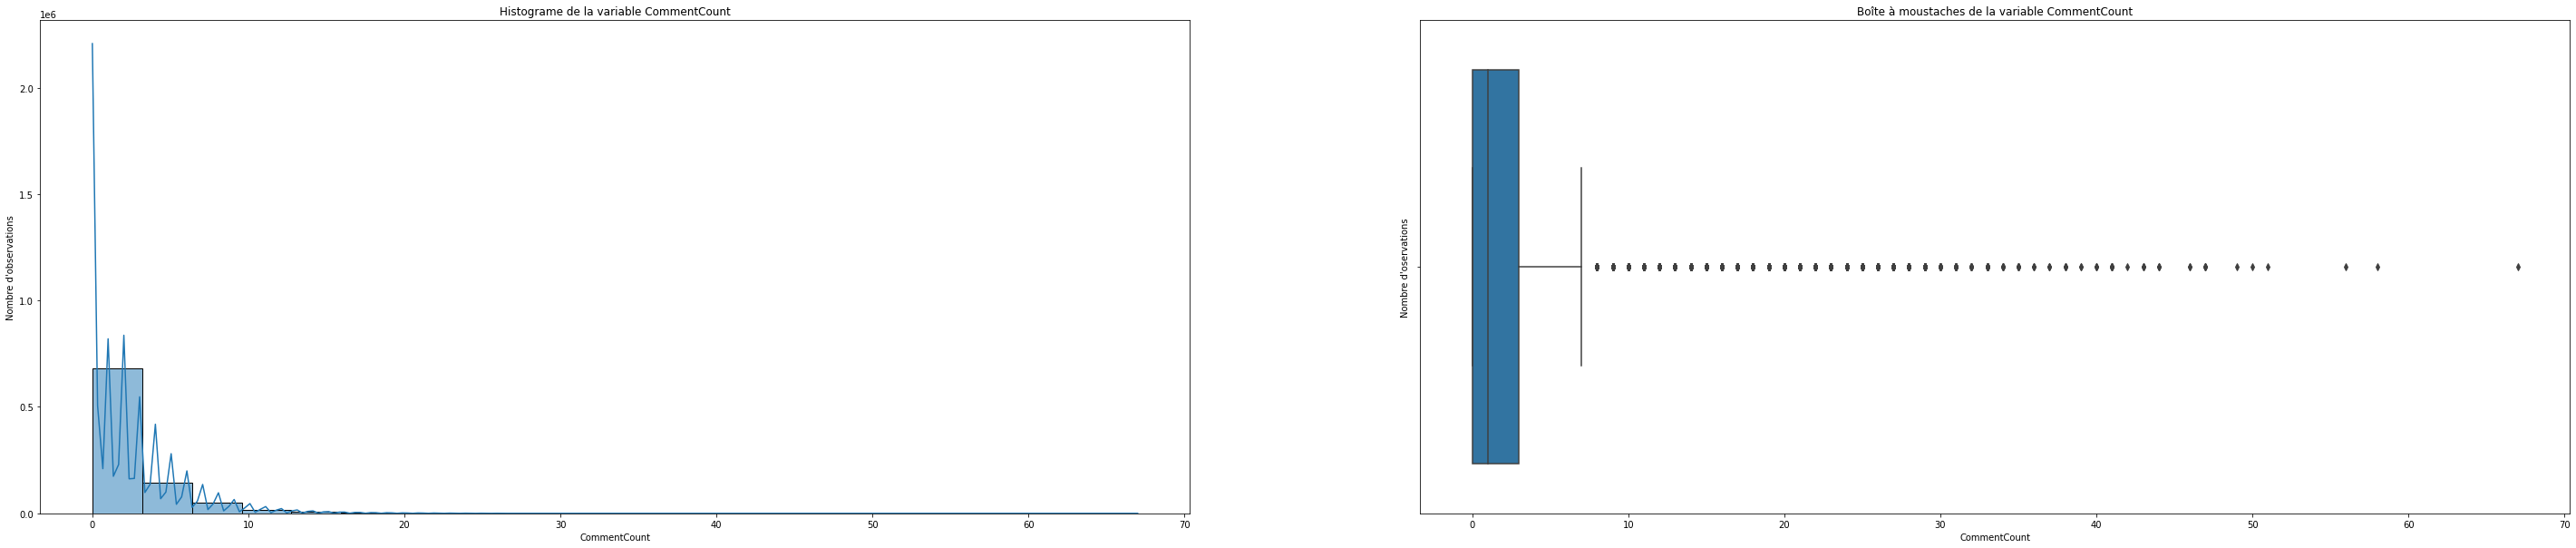


--------------------------------------------------

Indicateurs statistiques de distribution de la variable CommentCount:


count    902285.000000
mean          2.322042
std           3.038824
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          67.000000
Name: CommentCount, dtype: float64

In [7]:
plot_continuous_distribution(data=data, col='CommentCount')

La variable est centrée autour de 1 avec un interquartile entre 0 et 3

### FavoriteCount

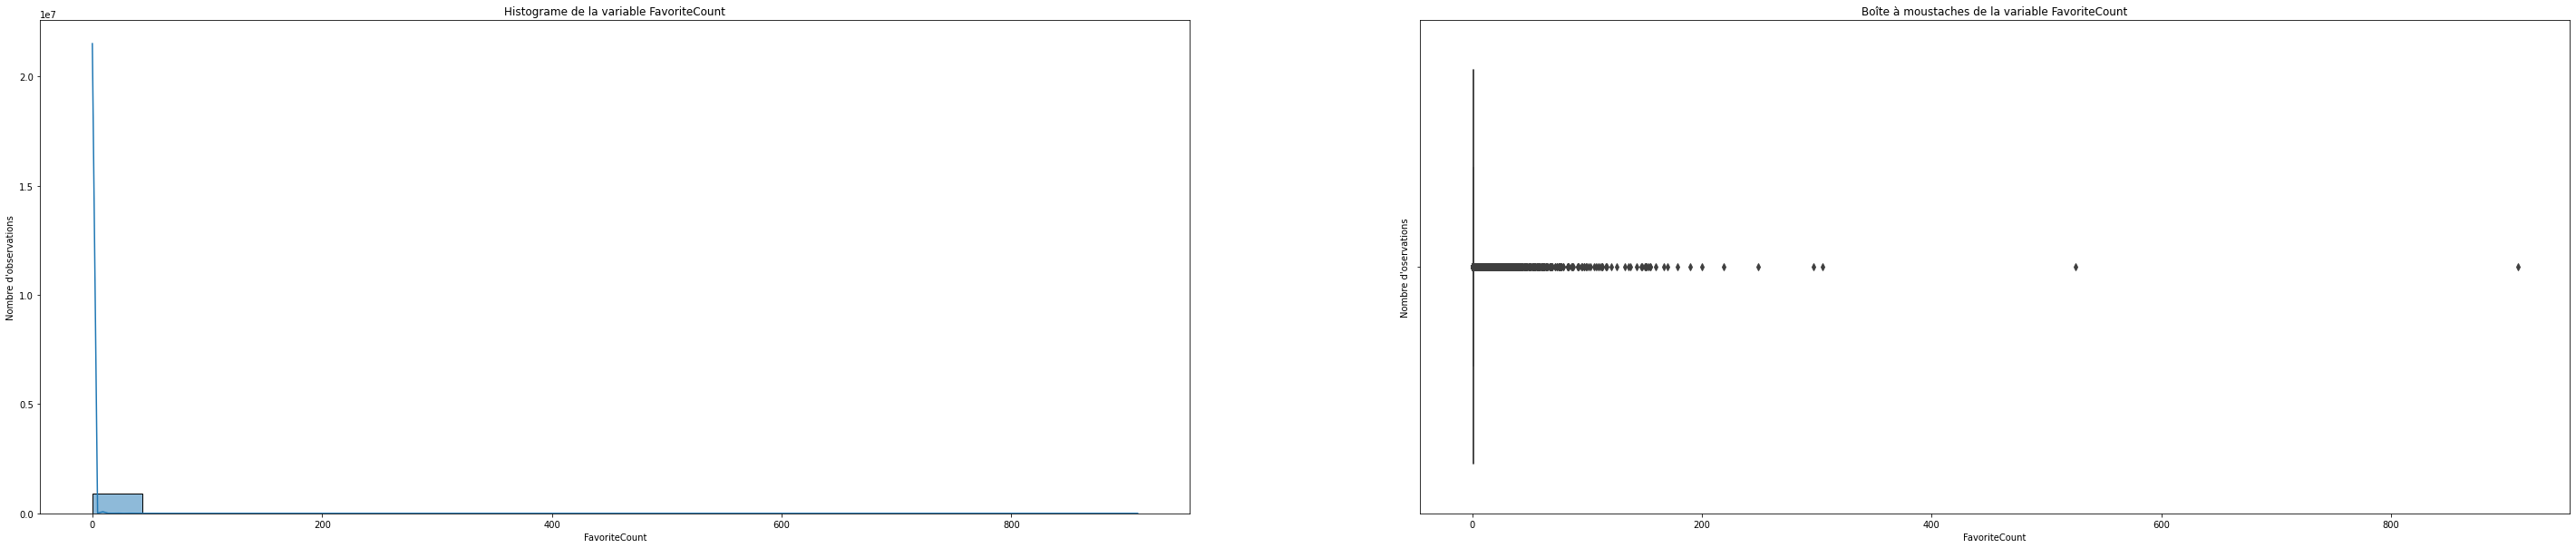


--------------------------------------------------

Indicateurs statistiques de distribution de la variable FavoriteCount:


count    902285.000000
mean          1.161199
std           2.275996
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         910.000000
Name: FavoriteCount, dtype: float64

In [8]:
plot_continuous_distribution(data=data, col='FavoriteCount')

Nous observons que la majorité des observations est située autour de 1. Observons à présent le nombre d'observations ayant une valeur supérieure.

In [9]:
fav_count_filter = data[data["FavoriteCount"]>1].copy()
print(f"Nombre d'observations ayant une valeur supérieure à 1 pour la variable FavoriteCount: {fav_count_filter.shape[0]}")
print(f"Proportion des observations ayant une valeur supérieure à 1 pour la variable FavoriteCount: {round(fav_count_filter.shape[0]/data.shape[0]*100,2)}%")

Nombre d'observations ayant une valeur supérieure à 1 pour la variable FavoriteCount: 150850
Proportion des observations ayant une valeur supérieure à 1 pour la variable FavoriteCount: 16.72%


### ViewCountByDay

Nous estimons que le ViewCount peu représenter un biais dans la mesure que des posts plus anciens ont potentiellement une propention à avoir un ValueCount plus élevé. Afin de vérifier l'hypothèse nous procédons de la sorte:
- Construction d'une variable CreationDateTimeDelta : différence entre la valeur maximum de CreationDate et valeur CreationDate de chaque observation
- Visualisation la distribution des points entre les variables ViewCount et CreationDateTimeDelta

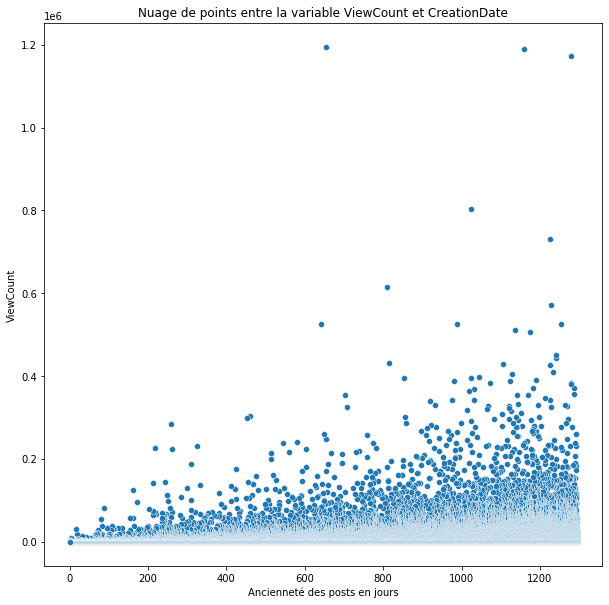

In [10]:
last_post = data["CreationDate"].max()
data["CreationDateTimeDelta"] = last_post - data["CreationDate"]
data["CreationDateTimeDelta"] = data["CreationDateTimeDelta"].dt.days

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.scatterplot(data=data, x="CreationDateTimeDelta", y="ViewCount", ax=ax)
ax.set_xlabel("Ancienneté des posts en jours")
ax.set_label("Nombre de vues")
ax.set_title("Nuage de points entre la variable ViewCount et CreationDate")
plt.show()

Nous n'observons pas de corrélation linéaire nette entre les deux variables sur l'ensemble des observations. Un phénomène est toutefois constatable sur certaines observations. Afin d'apprécier les corrélations, nous réalisons un des test de Pearson et de Spearman.

In [11]:
def corr_test(var1, var2, method='pearson'):
    """
    Statistical correlation test between two variables.
    
    Args:
        var1(dataframe Series): First Series to check correlation
        
        var2(dataframe Series): Second Series to check correlation
        
        method: Used method to compute correlation metric between 'pearson' and 'spearman'
        
    Returns:
        stat(float): Computed correlation metric
        
        p(float): Computed p value
    
    """
    import scipy.stats as st
    print("-"*50)
    if method == 'pearson':
        print(f"Test statistique de corrélation linéaire de Pearson entre {var1.name} et {var2.name}\n")
        stat, p = st.pearsonr(var1,var2)
        print(f"""Coeficient de corrélation linéaire de Pearson: {stat}\n p valeur: {p}\n""")
        if p < 0.05:
            print("L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%\n" )
        if p > 0.05:
            print("L'hypothèse H0 d'indépendance ne peut être rejetée avec un risque de 5\n")
    if method == 'spearman':
        print(f"Test statistique de corrélation de rang de Spearman entre {var1.name} et {var2.name}\n")
        stat, p = st.spearmanr(var1,var2)
        print(f"""Coeficient de corrélation de rang de Spearman: {stat}\n p valeur: {p}\n""")
        if p < 0.05:
            print("L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%\n" )
        if p > 0.05:
            print("L'hypothèse H0 d'indépendance ne peut être rejetée avec un risque de 5\n")       
    print("-"*50)
    
    
    return stat, p

corr_test(data["CreationDateTimeDelta"], data["ViewCount"],'pearson')
corr_test(data["CreationDateTimeDelta"], data["ViewCount"],'spearman')

--------------------------------------------------
Test statistique de corrélation linéaire de Pearson entre CreationDateTimeDelta et ViewCount

Coeficient de corrélation linéaire de Pearson: 0.13373053949733038
 p valeur: 0.0

L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%

--------------------------------------------------
--------------------------------------------------
Test statistique de corrélation de rang de Spearman entre CreationDateTimeDelta et ViewCount

Coeficient de corrélation de rang de Spearman: 0.40048144571974015
 p valeur: 0.0

L'hypothèse H0 d'indépendance peut être rejetée avec un risque de 5%

--------------------------------------------------


(0.40048144571974015, 0.0)

Les deux tests permettent de rejetter l'indépendance des variables. Ils permettent également de constater une corrélation linéaire faible et une corrélation de rang moyenne entre les deux variables. Afin d'apprécier la pertience d'un post en minimisant l'effet d'ancienneté, nous créons une variable ViewCountByDay. Il s'agit du rapport entre le nombre de vues (ViewCount), et l'ancienneté des posts (CreationDateTimeDelta)

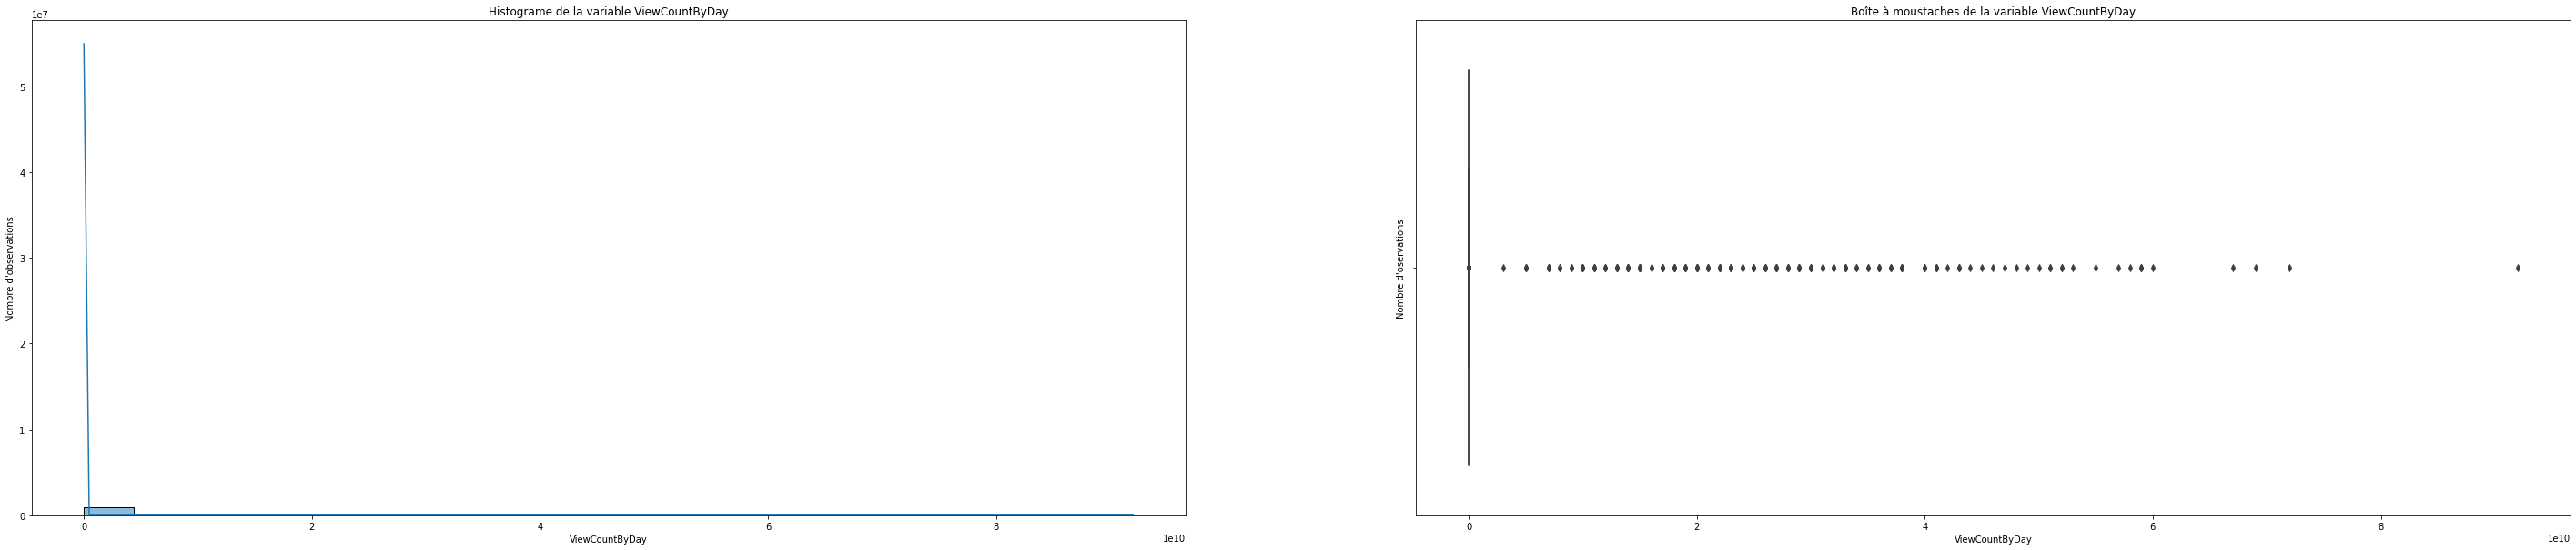


--------------------------------------------------

Indicateurs statistiques de distribution de la variable ViewCountByDay:


count    9.022850e+05
mean     5.670051e+06
std      4.455528e+08
min      5.942275e-03
25%      1.668003e-01
50%      5.194805e-01
75%      1.655804e+00
max      9.200000e+10
Name: ViewCountByDay, dtype: float64

In [12]:
data['ViewCountByDay'] =  data['ViewCount'] / (data['CreationDateTimeDelta']+0.000000001)
plot_continuous_distribution(data=data, col='ViewCountByDay')

### Corrélations entre les variables numériques

Afin d'évaluer les corrélations entre les variables, nous réalisons les matrices  Pearson et Spearman. 

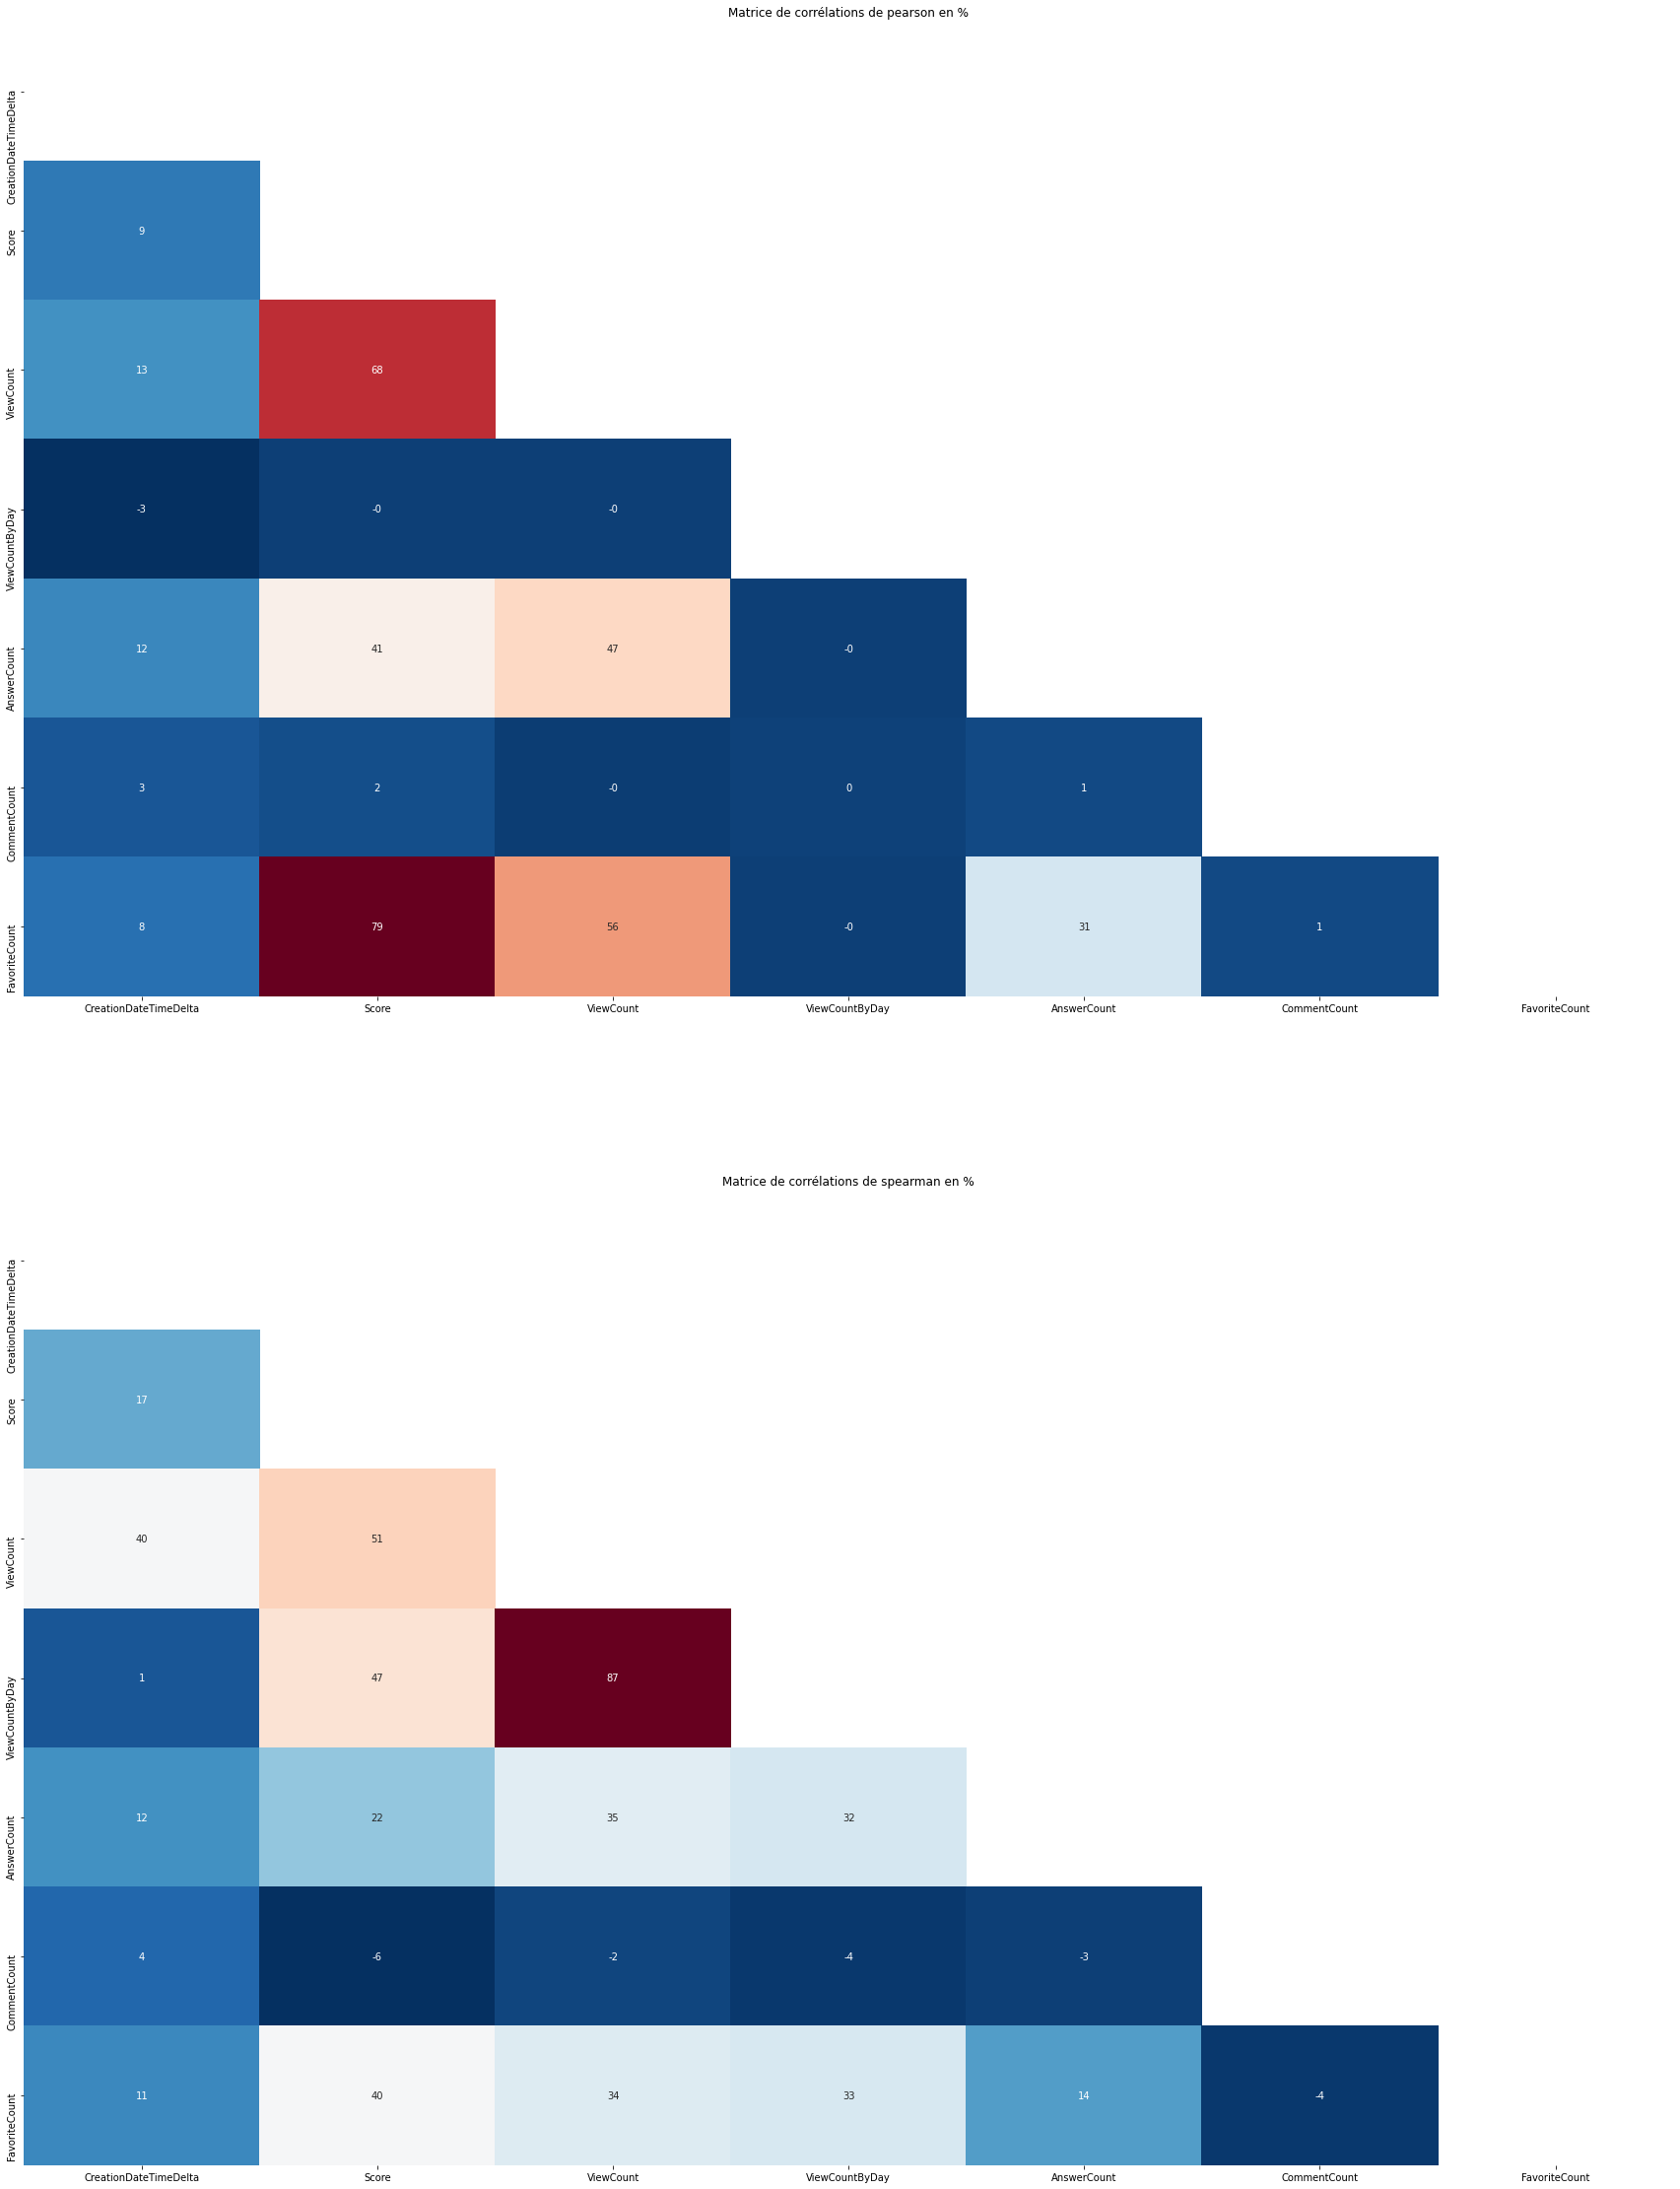

In [13]:
def correlations(data, methods):
    """
    Plot correlation matrix for quantitatives values.
    
    Args:
        data(dataframe): A dataframe
        
        method(string): CHosen method to compute correlation. Might be "pearson", "spearman" or "kendall"
        
    Returns:
        Correlation matrix
    """
    
    correlations = []
    cleanning_masks = []
    for method in methods: 
        correlation = data.select_dtypes(include=['int64','float64']).corr(method=method) * 100
        cleanning_mask = np.zeros_like(correlation)
        upper_triangle = np.triu_indices_from(correlation)
        cleanning_mask[upper_triangle] = 1
        correlations.append(correlation)
        cleanning_masks.append(cleanning_mask)

        
    fig, axes = plt.subplots(nrows=len(methods), figsize=(30,40))
    fig.subplots_adjust(wspace=0.2)

    for i in range(len(axes)):
        sns.heatmap(correlations[i], ax=axes[i], cmap="RdBu_r", mask = cleanning_masks[i], 
                   annot = True, fmt=".0f", cbar=False)

        axes[i].set_title(f"Matrice de corrélations de {methods[i]} en %")
  
    
correlations(data[["CreationDate","CreationDateTimeDelta","Score","ViewCount", "ViewCountByDay","AnswerCount","CommentCount","FavoriteCount"]], methods=["pearson", "spearman"])

Les visualisations permettent effectivement de constater des corrélations plus faibles avec la variable ViewCountByDay que VeiwCount . Nous décidons donc d’utiliser cette dernière. 

## Filtrage des données

Au vu de l'étude préalable nous décidons de placer un seuil à 0 pour les variables Socre, AnswerCount, CommentCount et FavoriteCount ainsi qu'un seuil à 5 pour ViewCountByDay.

In [14]:
filtered_data = data[(data['Score'] > 0) &
                           (data['AnswerCount']>0) &
                           (data['CommentCount']>0) &
                           (data['FavoriteCount']>0) &
                           (data['ViewCountByDay']>5)]
filtered_data.sort_values(['Score', 'ViewCount'], ascending=[False, False], inplace=True)
filtered_data_prop = round((filtered_data.shape[0] / data.shape[0] * 100),2)
display(filtered_data)
print(f"Porportion de données restantes: {filtered_data_prop}%")

filtered_data.to_csv('./data/filtered_data.csv')

,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags,CreationDateTimeDelta,ViewCountByDay
Id,,,,,,,,,,,
48270127,2018-01-15 20:20:47,2567,381324,27,17,910,Can (a== 1 && a ==2 && a==3) ever evaluate to ...,<blockquote>\n <p><strong>Moderator note:</st...,<javascript><ecmascript-6>,1279,2.981423e+02
52522565,2018-09-26 16:43:18,2387,803023,24,8,305,Git is not working after macOS Update (xcrun: ...,<p>I updated to macOS Mojave (this happens on ...,<xcode><git><macos><command-line><terminal>,1025,7.834371e+02
53452713,2018-11-23 20:40:10,875,248997,10,15,297,Why is 2 * (i * i) faster than 2 * i * i in Java?,<p>The following Java program takes on average...,<java><performance><benchmarking><bytecode><jit>,967,2.574943e+02
50718018,2018-06-06 10:22:16,787,512056,79,4,151,Xcode 10 Error: Multiple commands produce,<blockquote>\n <p>error: Multiple commands pr...,<info.plist><xcode10>,1137,4.503571e+02
50683786,2018-06-04 15:16:14,770,72613,1,14,160,"Why does array[idx++]+=""a"" increase idx once i...","<p>For a challenge, <a href=""https://stackover...",<java><java-8><javac><java-9><java-10>,1139,6.375154e+01
...,...,...,...,...,...,...,...,...,...,...,...
68410809,2021-07-16 14:31:05,1,18,1,3,1,How to add conditionally a `Button` to a `Tool...,<p>I have created a <code>Form</code> that is ...,<codenameone>,1,1.800000e+01
68423814,2021-07-17 19:48:37,1,18,1,1,1,How the pod can reflect the application exit c...,"<p>I'm running a K8S job, with the following f...",<kubernetes><containers><kubernetes-pod><kuber...,0,1.800000e+10
68384344,2021-07-14 19:56:40,1,17,1,3,1,GitHub Actions not creating files when it's in...,<p>I'm trying to learn how to use GitHub Actio...,<github><continuous-integration><github-actions>,3,5.666667e+00


Porportion de données restantes: 5.15%
